## Laboratorio#6
### Preámbulo

In [1]:
from scapy.all import * # Packet manipulation
import pandas as pd # Pandas - Create and Manipulate DataFrames
import numpy as np # Math Stuff (don't worry only used for one line :] )
import binascii # Binary to Ascii
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

Captura de 25 paquetes

In [3]:
num_of_packets_to_sniff = 25
pcap = sniff(count=num_of_packets_to_sniff)

# rdpcap returns packet list
## packetlist object can be enumerated
print(type(pcap))
print(len(pcap))
print(pcap)

<class 'scapy.plist.PacketList'>
25
<Sniffed: TCP:23 UDP:0 ICMP:0 Other:2>


<Ether  dst=40:5b:d8:95:5d:07 src=6c:63:9c:37:ef:60 type=IPv4 |<IP  version=4 ihl=5 tos=0x0 len=40 id=42706 flags=DF frag=0 ttl=108 proto=tcp chksum=0x663b src=40.126.24.147 dst=192.168.0.9 |<TCP  sport=https dport=39782 seq=1317107098 ack=1437256936 dataofs=5 reserved=0 flags=A window=16385 chksum=0xea40 urgptr=0 |<Padding  load='\x00\x00\x00\x00\x00\x00' |>>>>

In [ ]:
pcap[0]

TCP

In [6]:
"""
0                   1                   2                   3
0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|          Source Port          |       Destination Port        |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                        Sequence Number                        |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                    Acknowledgment Number                      |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|  Data |           |U|A|P|R|S|F|                               |
| Offset| Reserved  |R|C|S|S|Y|I|            Window             |
|       |           |G|K|H|T|N|N|                               |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|           Checksum            |         Urgent Pointer        |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                    Options                    |    Padding    |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                             data                              |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
02 04 05 a0 01 03 03 05 01 01 08 0a 1d 74 65 c5 00 00 00 00 04 02 00 00
"""
print()

#### Exploración

In [7]:
#Recordemos que en los modelos de red, las capas inferiores encapsulan la información de las capas superiores
#Frames en paquetes, paquetes en segmentos (Ethernet, IP), modelo TCP/IP

ethernet_frame = pcap[0]
ip_packet = ethernet_frame.payload
segment = ip_packet.payload
data = segment.payload #recupera la informacion de la capa 4

print("Informacion del frame:")
print(ethernet_frame.summary())

print("Informacion del paquete:")
print(ip_packet.summary())

print("Informacion del segmento:")
print(segment.summary())

print("Data:")
print(data.summary())

ethernet_frame.show()
data.show()

Informacion del frame:
Ether / IP / TCP 40.126.24.147:https > 192.168.0.9:39782 A / Padding
Informacion del paquete:
IP / TCP 40.126.24.147:https > 192.168.0.9:39782 A / Padding
Informacion del segmento:
TCP 40.126.24.147:https > 192.168.0.9:39782 A / Padding
Data:
Padding
###[ Ethernet ]### 
  dst       = 40:5b:d8:95:5d:07
  src       = 6c:63:9c:37:ef:60
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 40
     id        = 42706
     flags     = DF
     frag      = 0
     ttl       = 108
     proto     = tcp
     chksum    = 0x663b
     src       = 40.126.24.147
     dst       = 192.168.0.9
     \options   \
###[ TCP ]### 
        sport     = https
        dport     = 39782
        seq       = 1317107098
        ack       = 1437256936
        dataofs   = 5
        reserved  = 0
        flags     = A
        window    = 16385
        chksum    = 0xea40
        urgptr    = 0
        options   = ''
###[ Padding ]### 
           l

#### Tipos de datos en Scapy

In [8]:
print(type(ethernet_frame))
print(type(ip_packet))
print(type(segment))

# Packets can be filtered on layers ie) ethernet_frame[scapy.layers.l2.Ether]
ethernet_type = type(ethernet_frame)
ip_type = type(ip_packet)
tcp_type = type(segment)
print("Ethernet",pcap[ethernet_type])
print("IP", pcap[ip_type])
print("TCP", pcap[tcp_type])

# Scapy provides this via import statements
from scapy.layers.l2 import Ether
from scapy.layers.inet import IP
from scapy.layers.inet import TCP, UDP

print("UDP", pcap[UDP])

<class 'scapy.layers.l2.Ether'>
<class 'scapy.layers.inet.IP'>
<class 'scapy.layers.inet.TCP'>
Ethernet <Ether from Sniffed: TCP:23 UDP:0 ICMP:0 Other:2>
IP <IP from Sniffed: TCP:23 UDP:0 ICMP:0 Other:1>
TCP <TCP from Sniffed: TCP:23 UDP:0 ICMP:0 Other:0>
UDP <UDP from Sniffed: TCP:0 UDP:0 ICMP:0 Other:0>


#### Conversion de PCAP a DF

In [14]:
# Obtenemos los campos de IP/TCP/UDP que seran las columnas de nuestro DF
ip_fields = [field.name for field in IP().fields_desc]
tcp_fields = [field.name for field in TCP().fields_desc]
udp_fields = [field.name for field in UDP().fields_desc]

#Concatenamos todos los campos
dataframe_fields = ip_fields + ['time'] + tcp_fields + ['payload','payload_raw','payload_hex']

# Creamos un DF en blanco con los campos como columnas
df = pd.DataFrame(columns=dataframe_fields)
for packet in pcap[IP]:
    # Obtenemos los valores de los campos de cada fila
    field_values = []
    # A;adimos todos los valores de los campos de IP al df
    for field in ip_fields:
        if field == 'options':
            # Obtenemos el numero de opciones del IP Header
            field_values.append(len(packet[IP].fields[field]))
        else:
            field_values.append(packet[IP].fields[field])

    field_values.append(packet.time)

    layer_type = type(packet[IP].payload)
    for field in tcp_fields:
        try:
            if field == 'options':
                field_values.append(len(packet[layer_type].fields[field]))
            else:
                field_values.append(packet[layer_type].fields[field])
        except:
            field_values.append(None)

    # Agregamos el payload
    field_values.append(len(packet[layer_type].payload))
    field_values.append(packet[layer_type].payload.original)
    field_values.append(binascii.hexlify(packet[layer_type].payload.original))
    # Agregamos la fila al df
    df_append = pd.DataFrame([field_values], columns=dataframe_fields)
    df = pd.concat([df, df_append], axis=0)

# Reset Index
df = df.reset_index()
# Drop old index column
df = df.drop(columns="index")

df.head(5)

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,40,42706,DF,0,108,6,26171,...,5,0,A,16385,59968,0,None,6,b'\x00\x00\x00\x00\x00\x00',b'000000000000'
1,4,5,0,1500,42707,DF,0,108,6,24710,...,5,0,A,16385,51347,0,0,1460,b'\x17\x03\x03\x061\xed?wIS\xfa\x14\xba\xf8\xd...,b'1703030631ed3f774953fa14baf8db1c1d3dc18faecf...
2,4,5,0,170,42708,DF,0,108,6,26039,...,5,0,PA,16385,44381,0,0,130,"b""2\x98\xf0't5\xf8\xad\x0e\x9f\xbd\xa7\x11\x8b...",b'3298f0277435f8ad0e9fbda7118b397ae9e89fb6d98d...
3,4,5,0,40,49266,DF,0,64,6,30875,...,5,0,A,1024,8204,0,None,0,b'',b''
4,4,5,0,139,33724,DF,0,108,6,27986,...,5,0,PA,16383,9538,0,0,99,b'\x16\x03\x03\x00X\x02\x00\x00T\x03\x03\xcf!\...,b'1603030058020000540303cf21ad74e59a6111be1d8c...


In [11]:
# Return Src Address, Dst Address, Src Port, Dst Port
df[['src','dst','sport','dport']]

,src,dst,sport,dport
0,40.126.24.147,192.168.0.9,443,39782
1,40.126.24.147,192.168.0.9,443,39782
2,40.126.24.147,192.168.0.9,443,39782
3,192.168.0.9,40.126.24.147,39782,443
4,20.42.72.131,192.168.0.9,443,39783
5,192.168.0.9,20.42.72.131,39783,443
6,192.168.0.9,40.126.24.147,39782,443
7,20.42.72.131,192.168.0.9,443,39783
8,20.42.72.131,192.168.0.9,443,39783
9,192.168.0.9,20.42.72.131,39783,443


In [15]:
#Calcular estadisticas
print("# Top Source Address")
df['src'].describe()

# Top Source Address


count              24
unique              3
top       192.168.0.9
freq               12
Name: src, dtype: object

In [24]:
#¿Quien es la IP de origen mas frecuente?
frequent_address = df['src'].describe()['top']
print("Dirección más frecuente:",frequent_address)

# A que IPs les habla la IP mas frecuente
unique_dst = df[df['src'] == frequent_address]['dst'].unique()
print("\nIPs destino más frecuentes")
for address in unique_dst:
    print("->",address)

Dirección más frecuente: 192.168.0.9

IPs destino más frecuentes
-> 40.126.24.147
-> 20.42.72.131
-> 224.0.0.22


### Análisis estadístico

In [29]:
pcap_file = "analisis_paquetes.pcap"
pcap = rdpcap(pcap_file)
ip_fields = [field.name for field in IP().fields_desc]
tcp_fields = [field.name for field in TCP().fields_desc]
udp_fields = [field.name for field in UDP().fields_desc]
dataframe_fields = ip_fields + ['time'] + tcp_fields + ['payload', 'payload_raw', 'payload_hex']
df = pd.DataFrame(columns=dataframe_fields)


In [30]:
# Iterar sobre cada paquete en el archivo pcap
for packet in pcap[IP]:
    # Obtener los valores de los campos de cada fila
    field_values = []
    
    # Añadir todos los valores de los campos de IP al DataFrame
    for field in ip_fields:
        if field == 'options':
            # Obtener el número de opciones del IP Header
            field_values.append(len(packet[IP].fields[field]))
        else:
            field_values.append(packet[IP].fields[field])

    field_values.append(packet.time)

    layer_type = type(packet[IP].payload)
    
    # Añadir los valores de los campos de TCP al DataFrame
    for field in tcp_fields:
        try:
            if field == 'options':
                field_values.append(len(packet[layer_type].fields[field]))
            else:
                field_values.append(packet[layer_type].fields[field])
        except:
            field_values.append(None)

    # Añadir el payload
    payload_length = len(packet[layer_type].payload)
    field_values.append(payload_length)
    field_values.append(packet[layer_type].payload.original)
    field_values.append(binascii.hexlify(packet[layer_type].payload.original))
    
    # Añadir la fila al DataFrame
    df_append = pd.DataFrame([field_values], columns=dataframe_fields)
    df = pd.concat([df, df_append], axis=0)

In [31]:
df = df.reset_index()
df = df.drop(columns="index")

In [32]:
print("Primeras 5 filas del dataset:")
df.head()

Primeras 5 filas del dataset:


,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,961,1,,0,64,17,21222,...,None,None,None,None,62990,None,None,933,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
1,4,5,32,84,58919,,0,122,17,13836,...,None,None,None,None,65061,None,None,56,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,b'000c8180000100010000000006676f6f676c6503636f...
2,4,5,0,975,1,,0,64,17,21208,...,None,None,None,None,36378,None,None,947,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
3,4,5,32,84,59493,,0,122,17,13262,...,None,None,None,None,65063,None,None,56,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,b'000c8180000100010000000006676f6f676c6503636f...
4,4,5,0,1012,1,,0,64,17,21171,...,None,None,None,None,63846,None,None,984,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...


In [33]:
print("\nValores de las columnas:")
print("Src Address:", df['src'].unique())
print("Dst Address:", df['dst'].unique())
print("Src Port:", df['sport'].unique())
print("Dst Port:", df['dport'].unique())


Valores de las columnas:
Src Address: ['10.1.10.53' '84.54.22.33' '75.75.75.75']
Dst Address: ['84.54.22.33' '10.1.10.53' '75.75.75.75']
Src Port: [53 15812 23903]
Dst Port: [53 15812 23903]


#### Estadísticas

In [34]:
# a. Mostrar todas las IP origen
print("\nTodas las IP origen:")
print(df['src'].unique())

# b. Mostrar todas las IP destino
print("\nTodas las IP destino:")
print(df['dst'].unique())

# c. IP origen más frecuente
frequent_src_ip = df['src'].mode()[0]
print("\nIP origen más frecuente:", frequent_src_ip)

# i. IP destino más frecuente para la IP origen más frecuente
most_frequent_dst_for_src = df[df['src'] == frequent_src_ip]['dst'].mode()[0]
print("IP destino más frecuente para la IP origen más frecuente:", most_frequent_dst_for_src)

# ii. Puerto destino más frecuente para la IP origen más frecuente
most_frequent_dport_for_src = df[(df['src'] == frequent_src_ip) & (df['dst'] == most_frequent_dst_for_src)]['dport'].mode()[0]
print("Puerto destino más frecuente para la IP origen más frecuente:", most_frequent_dport_for_src)

# iii. Puertos origen desde los que se comunica la IP origen más frecuente
src_ports_for_frequent_src_ip = df[df['src'] == frequent_src_ip]['sport'].unique()
print("Puertos origen desde los que se comunica la IP origen más frecuente:", src_ports_for_frequent_src_ip)


Todas las IP origen:
['10.1.10.53' '84.54.22.33' '75.75.75.75']

Todas las IP destino:
['84.54.22.33' '10.1.10.53' '75.75.75.75']

IP origen más frecuente: 10.1.10.53
IP destino más frecuente para la IP origen más frecuente: 84.54.22.33
Puerto destino más frecuente para la IP origen más frecuente: 53
Puertos origen desde los que se comunica la IP origen más frecuente: [53 15812 23903]


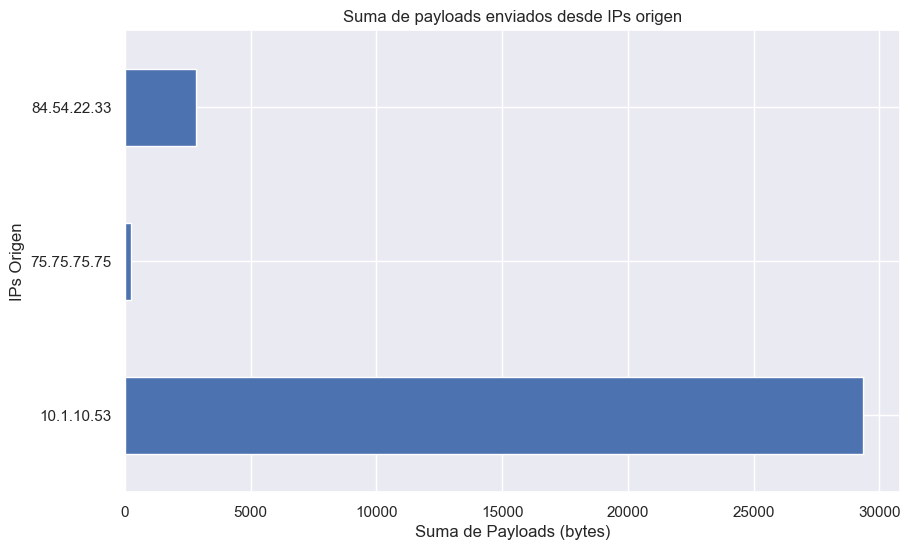

In [7]:
# Gráfica a. Suma de payloads enviados desde IPs origen
plt.figure(figsize=(10, 6))
df.groupby('src')['len'].sum().plot(kind='barh')
plt.title('Suma de payloads enviados desde IPs origen')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('IPs Origen')
plt.show()

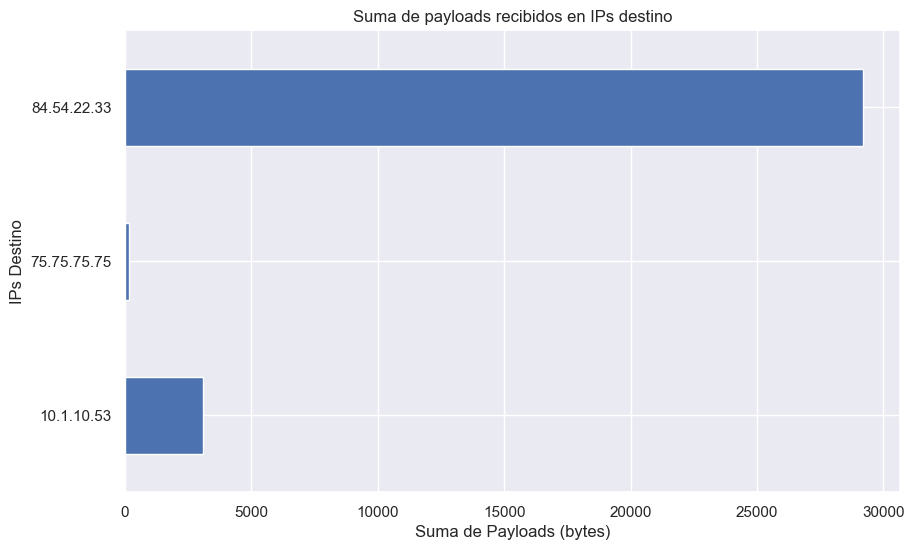

In [8]:
# Gráfica b. Suma de payloads recibidos en IPs destino
plt.figure(figsize=(10, 6))
df.groupby('dst')['len'].sum().plot(kind='barh')
plt.title('Suma de payloads recibidos en IPs destino')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('IPs Destino')
plt.show()

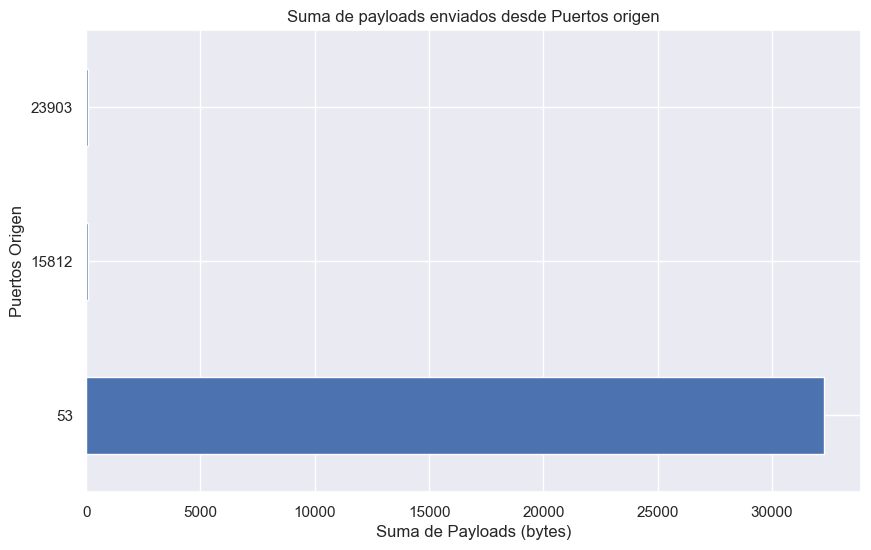

In [9]:
# Gráfica c. Suma de payloads enviados desde puertos origen
plt.figure(figsize=(10, 6))
df.groupby('sport')['len'].sum().plot(kind='barh')
plt.title('Suma de payloads enviados desde Puertos origen')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('Puertos Origen')
plt.show()

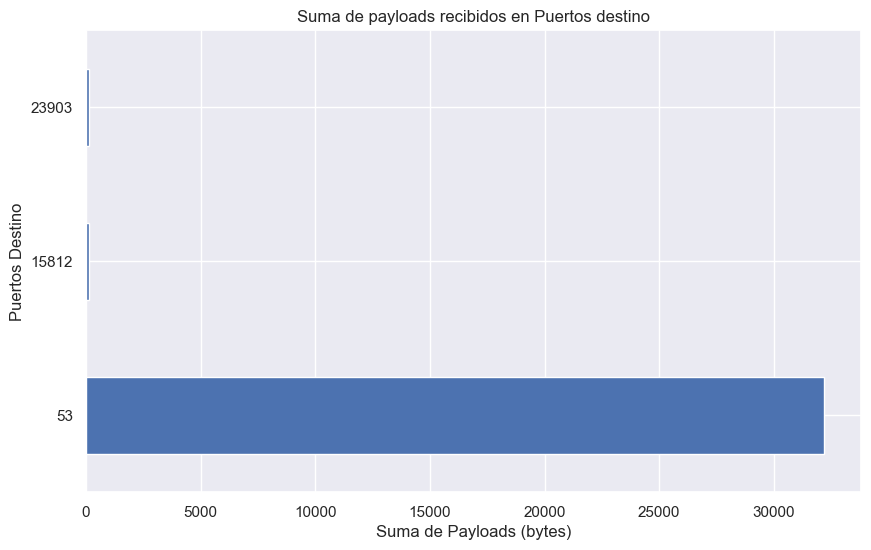

In [10]:
# Gráfica d. Suma de payloads recibidos en puertos destino
plt.figure(figsize=(10, 6))
df.groupby('dport')['len'].sum().plot(kind='barh')
plt.title('Suma de payloads recibidos en Puertos destino')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('Puertos Destino')
plt.show()

<Figure size 1000x600 with 0 Axes>

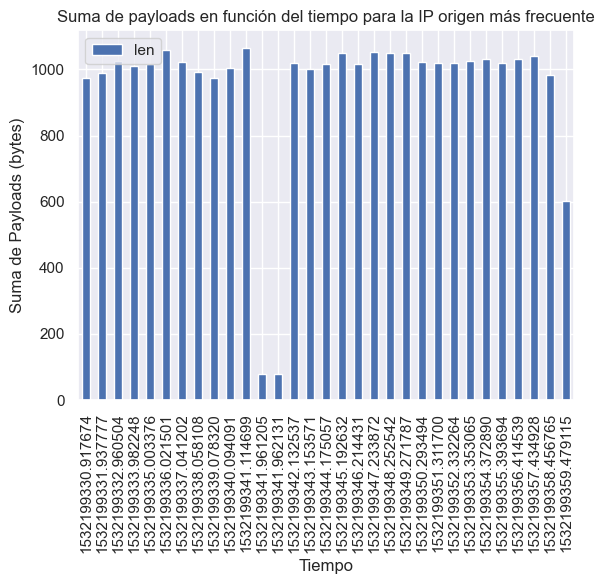

In [11]:
# Gráfica e. Suma de payloads en función del tiempo para la IP origen más frecuente
plt.figure(figsize=(10, 6))
df[df['src'] == frequent_src_ip].plot(x='time', y='len', kind='bar', stacked=True)
plt.title('Suma de payloads en función del tiempo para la IP origen más frecuente')
plt.xlabel('Tiempo')
plt.ylabel('Suma de Payloads (bytes)')
plt.show()

f. ¿Es común el comportamiento?<br>
R/ En general el comportamiento se mantiene similar, exceptuando por un par de marcas de tiempo donde la suma de payloads es muy baja en comparación a las demás, este comportamiento podría deberse a periodos de inactividad o problemas dentro de la red. También podrían representar una optimización en el envío de información y en dichas marcas de tiempo la cantidad de datos transferidos se minimizó.

### Investigación del payload

In [51]:
# Paso 7a: Crear un nuevo DataFrame que incluya solo las conexiones con la dirección IP origen más frecuente
df_frequent_src = df[df['src'] == frequent_src_ip]

# Paso 7b: Crear un nuevo DataFrame que utilice el DataFrame anterior con las columnas src, dst y payload y agruparlas por dst y la suma del payload
df_grouped_dst_payload = df_frequent_src.groupby('dst')['payload'].sum().reset_index()

# Paso 7c: Obtener la IP destino que más ha intercambiado bytes con la IP más frecuente
df_grouped_dst_payload['payload'] = pd.to_numeric(df_grouped_dst_payload['payload'])  # Convertir la columna 'payload' a datos numéricos
suspicious_dst_ip = df_grouped_dst_payload.loc[df_grouped_dst_payload['payload'].idxmax()]['dst']

# Paso 7d: Crear un nuevo DataFrame con la conversación entre la IP más frecuente y la IP sospechosa
df_suspicious_conversation = df_frequent_src[df_frequent_src['dst'] == suspicious_dst_ip]

# Paso 7e: Obtener los payloads del DataFrame del paso anterior y añadirlos a un array
payload_array = df_suspicious_conversation['payload_raw'].values

# Paso 7f: Mostrar el contenido del array
print("Contenido del array de payloads:")
print(payload_array)

# Paso 7g: Observar los primeros bytes del contenido de los payloads
print("\nPrimeros bytes del contenido de los payloads:")
for i, payload in enumerate(payload_array[:5]):
    print("Payload", i+1, ":", payload[:10])  # Muestra los primeros 10 bytes de cada payload


Contenido del array de payloads:
[b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00\x00\x06google\x03com\x00\x00\x1c\x00\x01\xef\xbf\xbdPNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01b\x00\x00\x00\xef\xbf\xbd\x08\x06\x00\x00\x00(\xef\xbf\xbdTR\x00\x00:\xef\xbf\xbdIDATx\xef\xbf\xbd\xef\xbf\xbd\t|T\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd;K\x12\x08;\x08\xef\xbf\xbd\nE\xef\xbf\xbd\xef\xbf\xbd$\x19\xef\xbf\xbd\xef\xbf\xbdZi\xdf\xaa-\xef\xbf\xbd;N2\xef\xbf\xbd\xef\xbf\xbdV\xef\xbf\xbdV\xef\xbf\xbda\xef\xbf\xbdZ\x11!\xef\xbf\xbd\xef\xbf\xbd\x01\xdc\xbbik[\xef\xbf\xbd.ok\xef\xbf\xbde\xef\xbf\xbd\x01\\\xef\xbf\xbd\xef\xbf\xbd]\xef\xbf\xbd-\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbdd\xef\xbf\xbd\x08\xef\xbf\xbd\x08\xef\xbf\xbd\xef\xbf\xbdg\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd<\xef\xbf\xbd\xef\xbf\xbdL\x12\xef\xbf\xbd$3wf\xef\xbf\xbd\xef\xbf\xbd\x02<_\r\xef\xbf\xbdY\xef\xbf\xbdr\xef\xbf\xbd\xef\xbf\xbdy\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\x1c\r\x18\xef\xbf\xbd8c\xef\xbf\xbdew\r\x1e\xef\xbf\x

El array de payloads contiene una variedad de datos en formato binario, que incluyen archivos, imágenes u otros tipos de información. Los primeros bytes del contenido pueden revelar información importante sobre el tipo de datos transmitidos y ayudar a identificar posibles anomalías o comportamientos sospechosos. La mayoría de solicitudes siguen el mismo formato de los payload 1-5, estos bytes son consistentes con el formato de una solicitud DNS estándar, donde se especifican los identificadores de transacción, los flags de la solicitud y el contador de preguntas, entre otros campos. 